<center> <img src="https://www.ufrn.br/resources/documentos/identidadevisual/brasao/brasao_flat.png" width="100" height="100"> </center>

# **<center> IMPLEMENTAÇÃO DE REDES NEURAIS MLP - FASHION MNIST </center>**
    
---

**Disciplina:** Tópicos Especiais em Inteligência Artificial
​
**Docente:** José Alfredo
​
**Discentes:**
* [Douglas Wilian](https://github.com/Douglas-Wilian)
* [Roger José](https://github.com/rogerdox)

###IMPLEMENTAÇÃO FROM SCRATCH

De forma semelhante ao realizado na implementação utilizando o TensorFlow, os dados foram processados. Claro que, com a adequação de algumas funções que não serão utilizadas na rede.

Além disso, a rede neural foi desenvolvida tomando como referência alguns códigos já existentes no Github e com a adequação dos parâmetros para a base de dados trabalhada.

Epoch 1/50 - Train Loss: 3.1004 - Val Loss: 3.1218 - Train Acc: 0.0641 - Val Acc: 0.0658
Epoch 2/50 - Train Loss: 3.0359 - Val Loss: 3.0567 - Train Acc: 0.0659 - Val Acc: 0.0666
Epoch 3/50 - Train Loss: 2.9752 - Val Loss: 2.9954 - Train Acc: 0.0682 - Val Acc: 0.0697
Epoch 4/50 - Train Loss: 2.9179 - Val Loss: 2.9376 - Train Acc: 0.0716 - Val Acc: 0.0740
Epoch 5/50 - Train Loss: 2.8637 - Val Loss: 2.8829 - Train Acc: 0.0758 - Val Acc: 0.0781
Epoch 6/50 - Train Loss: 2.8124 - Val Loss: 2.8310 - Train Acc: 0.0814 - Val Acc: 0.0839
Epoch 7/50 - Train Loss: 2.7636 - Val Loss: 2.7816 - Train Acc: 0.0880 - Val Acc: 0.0910
Epoch 8/50 - Train Loss: 2.7171 - Val Loss: 2.7346 - Train Acc: 0.0956 - Val Acc: 0.0975
Epoch 9/50 - Train Loss: 2.6728 - Val Loss: 2.6898 - Train Acc: 0.1038 - Val Acc: 0.1037
Epoch 10/50 - Train Loss: 2.6304 - Val Loss: 2.6469 - Train Acc: 0.1124 - Val Acc: 0.1102
Epoch 11/50 - Train Loss: 2.5899 - Val Loss: 2.6059 - Train Acc: 0.1214 - Val Acc: 0.1177
Epoch 12/50 - Train

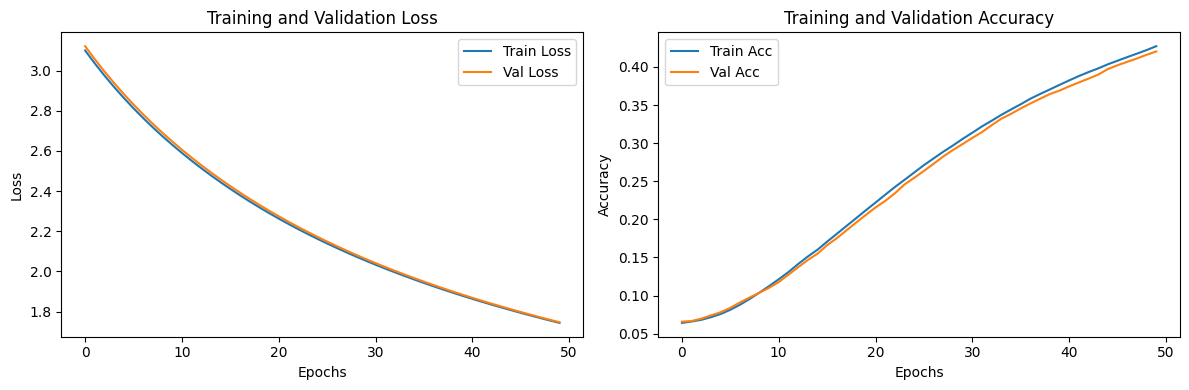

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


#PROCESSAMENTO DOS DADOS - SEMELHANTE AO REALIZADO COM A TENSORFLOW

#Utilização da Fashion Mnist disponível na TensorFlow
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Redimensionamento das imagens
x_train = x_train.reshape((x_train.shape[0], -1)) / 255.0
x_test = x_test.reshape((x_test.shape[0], -1)) / 255.0

#Normalização dos dados para um melhor desempenho
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Categorizando as classes utilizando a NumPy, semelhante ao que foi realizado no código anterior com a função keras.utils.to_categorical
num_classes = 10
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]


#IMPLEMENTAÇÃO DA MLP

# Função ReLU
def relu(x):
    return np.maximum(0, x)

# Função Softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Inicialização dos pesos através da inicialização Xavier/Glorot (Gaussiana de média 0 e variância baseada nas conexões de entrada e saída)
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2/input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, hidden_size) * np.sqrt(2/hidden_size)
    b2 = np.zeros((1, hidden_size))
    W3 = np.random.randn(hidden_size, output_size) * np.sqrt(2/hidden_size)
    b3 = np.zeros((1, output_size))
    return {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}

# Computação da saída da rede neural
def forward_propagation(X, parameters):
    Z1 = np.dot(X, parameters['W1']) + parameters['b1']
    A1 = relu(Z1)
    Z2 = np.dot(A1, parameters['W2']) + parameters['b2']
    A2 = relu(Z2)
    Z3 = np.dot(A2, parameters['W3']) + parameters['b3']
    A3 = softmax(Z3)
    return {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2, 'Z3': Z3, 'A3': A3}

# Função para calcular a perda (cross-entropy)
def compute_loss(Y, Y_pred):
    m = Y.shape[0]
    loss = -np.sum(Y * np.log(Y_pred + 1e-8)) / m
    return loss

# Calcula os gradientes em relação aos parâmetros e realiza a atualização dos pesos usando o gradiente descendente
def backward_propagation(X, Y, parameters, cache, learning_rate=0.01):
    m = X.shape[0]

    dZ3 = cache['A3'] - Y
    dW3 = np.dot(cache['A2'].T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m

    dZ2 = np.dot(dZ3, parameters['W3'].T) * (cache['A2'] > 0)
    dW2 = np.dot(cache['A1'].T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    dZ1 = np.dot(dZ2, parameters['W2'].T) * (cache['A1'] > 0)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m

    # Atualizando os parâmetros
    parameters['W3'] -= learning_rate * dW3
    parameters['b3'] -= learning_rate * db3
    parameters['W2'] -= learning_rate * dW2
    parameters['b2'] -= learning_rate * db2
    parameters['W1'] -= learning_rate * dW1
    parameters['b1'] -= learning_rate * db1

# Função para treinar a rede neural
def train_mlp(X_train, Y_train, X_val, Y_val, hidden_size=512, num_epochs=50, learning_rate=0.001):
    input_size = X_train.shape[1]
    output_size = Y_train.shape[1]

    parameters = initialize_parameters(input_size, hidden_size, output_size)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        # Forward pass no conjunto de treinamento
        train_cache = forward_propagation(X_train, parameters)
        train_loss = compute_loss(Y_train, train_cache['A3'])

        # Forward pass no conjunto de validação
        val_cache = forward_propagation(X_val, parameters)
        val_loss = compute_loss(Y_val, val_cache['A3'])

        # Calcular acurácia
        train_accuracy = np.mean(np.argmax(train_cache['A3'], axis=1) == np.argmax(Y_train, axis=1))
        val_accuracy = np.mean(np.argmax(val_cache['A3'], axis=1) == np.argmax(Y_val, axis=1))

        # Armazenar métricas
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        # Imprimir métricas
        print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f} - Train Acc: {train_accuracy:.4f} - Val Acc: {val_accuracy:.4f}")

        # Backward pass e atualização dos parâmetros
        backward_propagation(X_train, Y_train, parameters, train_cache, learning_rate)

    # Plotar gráfico
    plt.figure(figsize=(12, 4))

    # Plotar perda
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plotar acurácia
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Train Acc')
    plt.plot(val_accuracies, label='Val Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Dividindo os dados em conjunto de treinamento e validação
X_train, X_val, Y_train_one_hot, Y_val_one_hot = train_test_split(x_train, y_train_one_hot, test_size=0.2)

# Treinando a MLP
train_mlp(X_train, Y_train_one_hot, X_val, Y_val_one_hot, num_epochs=50, learning_rate=0.001)
